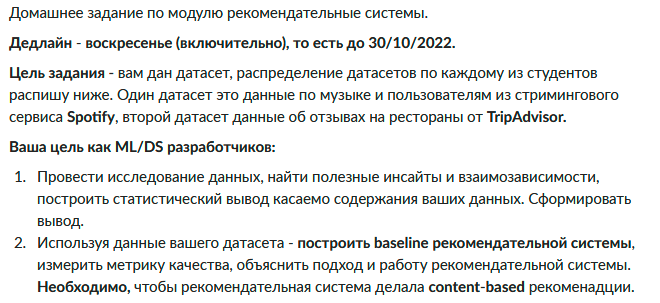

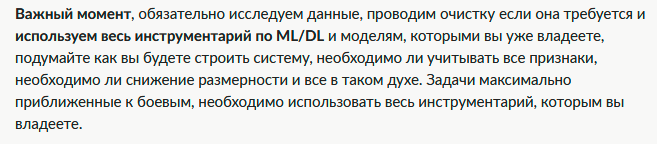

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from yellowbrick.target import FeatureCorrelation

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install watermark --quiet
%load_ext watermark
%watermark -a 'Anrei Sech' -v

Author: Anrei Sech

Python implementation: CPython
Python version       : 3.7.15
IPython version      : 7.9.0



In [3]:
from google.colab import drive
drive.mount('/drive/')

Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [120]:
import os.path
parentFolder = '/drive/My Drive/Recommendation system/data/'
data = pd.read_csv(os.path.join(parentFolder, "data.csv"))
data_by_artist = pd.read_csv(os.path.join(parentFolder, "data_by_artist.csv"), encoding='utf8')
data_by_genres = pd.read_csv(os.path.join(parentFolder, "data_by_genres.csv"), encoding='utf8')
data_by_year = pd.read_csv(os.path.join(parentFolder, "data_by_year.csv"), encoding='utf8')
data_w_genres = pd.read_csv(os.path.join(parentFolder, "data_w_genres.csv"), encoding='utf8')

In [121]:
data_by_artist.info(), data_by_artist.shape, data_w_genres.info(), data_w_genres.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB
<class 'pandas.core.frame.Dat

(None, (28680, 15), None, (28680, 16))

In [122]:
data_by_artist.head()

mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

In [123]:
data_w_genres.head()

genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210389  117.518111  0.389500   38.333333    5   
1  0.315215 -10.690000     0.176212  103.044154  0.268865   30.576923    5   
2  0.325786 -15.230714     0.118514   77.375857  0.354857   34.857143    0   
3  0.275481 -15.639370     0.123200   88.667630  0.372030   34.851852    0   
4  0.195000 -10.236714     0.098543  122.835857  0.482286   43.000000    5   

   mode  count  
0     1      9  
1     1     26  
2     1      7  
3     1     27  
4     1      7

Как видим, две таблицы (data_by_artist, data_w_genres) содержат одинаковое количество данных, в указанных массивах данный совпадают названия артистов и даже порядок их следования. Поэтому их легко можно объединить.

In [124]:
for column in data_w_genres.columns:
    if column not in data_by_artist.columns:
        data_by_artist[column] = data_w_genres[column]

In [125]:
data_by_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
 15  genres            28680 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

Итого данные по артистам теперь дополнились жанром

## Первичный анализ данных

У нас имеются данные о различных характеристиках музыкальных композиций в разрезе артистов, жанров, лет. Данные об индивидуальных предпочтениях пользователей отсутствуют, поэтому в качестве будем использовать content-based подход к построению рекомендательной системе.
Но кроме того массив данных содержит характеристику популярности, которую можно учитывать в качестве целевого критерия (чем выше популярность, больше больше вероятность того, что среднестатистическому пользователю рекомендуемая композиция понравится)

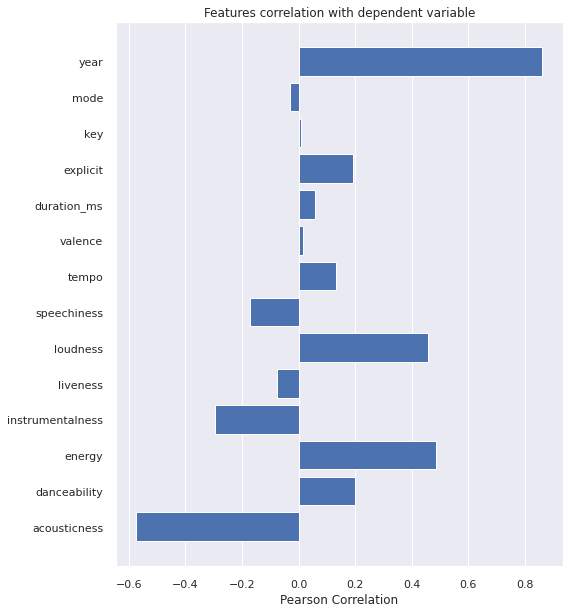

In [126]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                 'speechiness', 'tempo', 'valence', 'duration_ms', 'explicit', 'key', 'mode', 'year']
X, y = data[feature_names], data['popularity']
features = np.array(feature_names)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,10)
visualizer.fit(X, y)
visualizer.show();

### Данные по годам

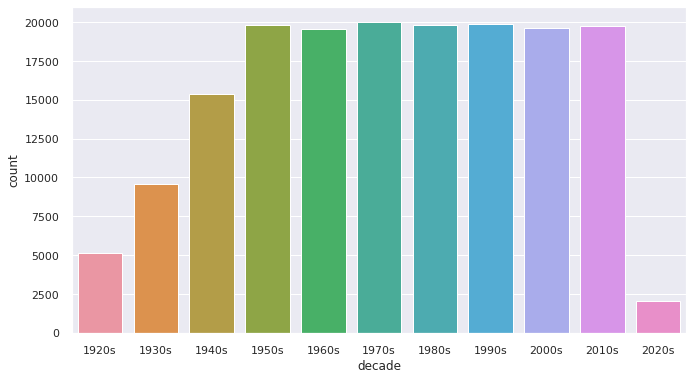

In [127]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11, 6)})
sns.countplot(data['decade']);

Основной массив данных содержит треки за период с 1920х по 2020е гг., причем начиная с 1950х содерижтся примерно равное количество песен (20000) за каждую из декад.
Посмотрим, менялась ли качественно музыка в данные периоды:

In [128]:
sound_features_to_show = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig = px.line(data_by_year, x='year', y=sound_features_to_show)
fig.show()

Как видим, звуковые характеристики существенно изменяются во времени. Так например, иструментальность, аккустичность после примерно 1960 года существенно снизилась, в то время, как энергичность композиций повышается

Осуществим кластеризацию, чтобы выделить характерные музыкальные эпохи

In [129]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [130]:
fig = px.scatter_matrix(
    data_by_year,
    dimensions=sound_features,
    color="year"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [131]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=5))])
X = data_by_year[sound_features]
cluster_pipeline.fit(X)
data_by_year['epoch'] = cluster_pipeline.predict(X)

In [132]:
X = data_by_year[sound_features]
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
year_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=year_embedding)
projection['year'] = data_by_year['year']
projection['epoch'] = data_by_year['epoch']

fig = px.scatter(
    projection, x='x', y='y', color='epoch', hover_data=['x', 'y', 'year'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 1.415509
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.120537
[t-SNE] KL divergence after 1000 iterations: 0.092860


### Данные по жанрам

In [133]:
data_by_genres['genres'].unique()

array(['21st century classical', '432hz', '8-bit', ..., 'zouk',
       'zurich indie', 'zydeco'], dtype=object)

In [134]:
print("{} unique genres from {}".format(data_by_genres['genres'].nunique(), data_by_genres.shape[0]))

2973 unique genres from 2973


In [135]:
top20_genres = data_by_genres.nlargest(20, 'popularity')

fig = px.bar(top20_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show();

Как видим, жанры характериуются различным набором характеристик. Можно поступить таким же образом и сгруппируем жанры, которые обладают схожим набором музыкальных характеристик

In [136]:
sound_features_to_show = ['valence', 'energy', 'danceability', 'acousticness']

fig = px.scatter_matrix(
    data_by_genres,
    dimensions=sound_features_to_show,
    color="genres"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [137]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_clusters = 8
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=n_clusters))])
X = data_by_genres[sound_features]
cluster_pipeline.fit(X)
data_by_genres['cluster'] = cluster_pipeline.predict(X)

In [138]:
X = data_by_genres[sound_features]
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = data_by_genres['genres']
projection['cluster'] = data_by_genres['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.516312
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.988220
[t-SNE] KL divergence after 1000 iterations: 1.347163


### Данные по артистам

In [139]:
data_by_artist['artists'].unique(), data_by_artist['artists'].nunique(), data_by_artist.shape[0]

(array(['"Cats" 1981 Original London Cast', '"Cats" 1983 Broadway Cast',
        '"Fiddler On The Roof” Motion Picture Chorus', ..., '黃國隆', '黑豹',
        '조정현'], dtype=object), 28680, 28680)

In [140]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_clusters = 500
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=n_clusters))])
X = data_by_artist[sound_features]
cluster_pipeline.fit(X)
data_by_artist['cluster'] = cluster_pipeline.predict(X)

In [141]:
X = data_by_artist[sound_features]
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
artist_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=artist_embedding)
projection['artists'] = data_by_artist['artists']
projection['cluster'] = data_by_artist['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'artists'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28680 samples in 0.035s...
[t-SNE] Computed neighbors for 28680 samples in 5.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28680
[t-SNE] Computed conditional probabilities for sample 2000 / 28680
[t-SNE] Computed conditional probabilities for sample 3000 / 28680
[t-SNE] Computed conditional probabilities for sample 4000 / 28680
[t-SNE] Computed conditional probabilities for sample 5000 / 28680
[t-SNE] Computed conditional probabilities for sample 6000 / 28680
[t-SNE] Computed conditional probabilities for sample 7000 / 28680
[t-SNE] Computed conditional probabilities for sample 8000 / 28680
[t-SNE] Computed conditional probabilities for sample 9000 / 28680
[t-SNE] Computed conditional probabilities for sample 10000 / 28680
[t-SNE] Computed conditional probabilities for sample 11000 / 28680
[t-SNE] Computed conditional probabilities for sample 12000 / 28680
[t-SNE] Computed conditional probabilities for sam

### Композиция данных

In [142]:
def get_epoch(year):
    return data_by_year['epoch'].loc[data_by_year['year'] == year].item()

In [143]:
data['epoch'] = data['year'].apply(get_epoch)

In [144]:
data['artists'] = data['artists'].map(lambda x: x.lstrip('[').rstrip(']'))

In [145]:
def parse_multiples(values_str):
    values = values_str.split(',')
    values = [ value.strip("'").strip().strip("'") for value in values ]
    return values

## Построение рекоммендательной системы

In [146]:
from enum import Enum

class ByMethod(Enum):
    ByArtists = 1,
    ByGenre = 2,
    ByYear = 3

ByMethod = Enum('ByMethod', ['ByArtists', 'ByGenre', 'ByYear'])

In [214]:
popularity_filter = data.loc[data['popularity'] >= 40]

In [147]:
features = data[sound_features]

In [315]:
def recommend_songs(spotify_data, song=None, n_songs=10, popularity_threshhold=40, ByMethod=ByMethod.ByArtists):

    if song is not None:

        popularity_filter = (spotify_data['popularity'] >= popularity_threshhold)
        
        distances = pairwise_distances(features, song[sound_features], metric='euclidean')
        spotify_data['distances'] = distances
        
        if ByMethod==ByMethod.ByArtists:
            artists = parse_multiples(song['artists'].item())
            idx = pd.Index([], dtype='int64')
            for artist in artists:
                cluster = data_by_artist['cluster'].loc[data_by_artist['artists']==artist].item()
                partial_idx = data_by_artist.loc[data_by_artist['cluster']==cluster].index
                idx = idx.union(partial_idx)

            set_of_similar_artists = data_by_artist['artists'].loc[idx].tolist()
            filter = spotify_data['artists'].apply(lambda x: any([artist in x for artist in set_of_similar_artists]))
            
            recommended_songs_idx = spotify_data['distances'].loc[filter & popularity_filter].sort_values(ascending=True).index
            recommended_songs = spotify_data.loc[recommended_songs_idx[:n_songs]]

        elif ByMethod==ByMethod.ByGenre:
            artists = parse_multiples(song['artists'].item())
            idx = pd.Index([], dtype='int64')
            for artist in artists:
                genres = parse_multiples(data_by_artist['genres'].loc[data_by_artist['artists']==artist].item())
                genres_filter = data_by_genres['genres'].apply(lambda x: any([genre in x for genre in genres]))
                genre_clusters = data_by_genres['cluster'].loc[genres_filter]

                partial_idx = genre_clusters.index
                idx = idx.union(partial_idx)

            set_of_similar_genres = data_by_genres['genres'].loc[idx].tolist()
            genres_filter = data_by_artist['genres'].apply(lambda x: any([genre in x for genre in set_of_similar_genres]))

            set_of_similar_artists_similar_genres = data_by_artist['artists'].loc[genres_filter].tolist()
            filter = spotify_data['artists'].apply(lambda x: any([artist in x for artist in set_of_similar_artists_similar_genres]))
            
            recommended_songs_idx = spotify_data['distances'].loc[filter & popularity_filter].sort_values(ascending=True).index
            recommended_songs = spotify_data.loc[recommended_songs_idx[:n_songs]]          
        
        elif ByMethod==ByMethod.ByYear:
            epoch = song['epoch'].item()
            epoch_filter = (spotify_data['epoch']==epoch)
            
            recommended_songs_idx = spotify_data['distances'].loc[epoch_filter & popularity_filter].sort_values(ascending=True).index
            recommended_songs = spotify_data.loc[recommended_songs_idx[:n_songs]]

    else:
        recommended_songs_idx = spotify_data["popularity"].sort_values(ascending=True).index
        recommended_songs = spotify_data.iloc[recommended_songs_idx[:n_songs]]

    return recommended_songs[['name', 'artists', 'year', 'popularity', 'distances']]

*Дефолтная рекоммендация (холодный старт)*

In [149]:
recommend_songs(data)

name  \
19611                                   Dakiti   
19606                   Mood (feat. iann dior)   
19618                                 Dynamite   
19616                          Blinding Lights   
19608          WAP (feat. Megan Thee Stallion)   
19612                  What You Know Bout Love   
19610                                positions   
19623                       you broke me first   
19607  For The Night (feat. Lil Baby & DaBaby)   
19620               Lonely (with benny blanco)   

                                 artists    year  popularity distances  
19611         'Bad Bunny', 'Jhay Cortez'  2020.0       100.0            
19606            '24kGoldn', 'iann dior'  2020.0        99.0            
19618                              'BTS'  2020.0        97.0            
19616                       'The Weeknd'  2020.0        96.0            
19608   'Cardi B', 'Megan Thee Stallion'  2020.0        96.0            
19612                        'Pop Smoke'  2020.0        96.0            
19610                    'Ariana Grande'  2020.0        96.0            
19623                       'Tate McRae'  2020.0        95.0            
19607  'Pop Smoke', 'Lil Baby', 'DaBaby'  2020.0        95.0            
19620    'Justin Bieber', 'benny blanco'  2020.0        95.0

*Рекомендация по заданной музыкальной композиции (по дате, артисту и жанру)*

In [153]:
random_song = data.sample(n = 1)

In [171]:
random_song[['name', 'artists', 'year', 'popularity']]

name  \
111238  Die Meistersinger von Nürnberg - Act 3: So gan...   

                                                  artists  year  popularity  
111238  'Richard Wagner', 'Hilde Gueden', 'Paul Schöff...  1952           0

In [227]:
recommend_songs(data, random_song, ByMethod=ByMethod.ByYear)

name  \
7617                                              Naima   
7257                               The Twelfth Of Never   
7145                           There Is No Greater Love   
7424                            Smoke Gets In Your Eyes   
7672                                       Such a Night   
5008  Frosty the Snowman (with The Cass County Boys)...   
7222                                     Chantilly Lace   
7208                                      Rockin' Robin   
7373                                Reelin' And Rockin'   
7283  The Christmas Song (Chestnuts Roasting on an O...   

                               artists  year  popularity  distances  
7617                   'John Coltrane'  1960          59   0.479327  
7257                   'Johnny Mathis'  1958          46   0.643963  
7145                      'Chet Baker'  1957          41   0.690006  
7424                    'The Platters'  1959          63   0.698953  
7672                   'Elvis Presley'  1960          47   1.039641  
5008  'Gene Autry', 'Cass County Boys'  1947          56   1.040198  
7222                  'The Big Bopper'  1958          56   1.160018  
7208                       'Bobby Day'  1958          64   1.167801  
7373                     'Chuck Berry'  1958          41   1.493490  
7283                   'Johnny Mathis'  1958          41   1.518282

In [230]:
recommend_songs(data, random_song, ByMethod=ByMethod.ByArtists)

name  \
30181                    Cavalleria rusticana: Intermezzo   
11689                                       Woman in Love   
166898                                      Woman In Love   
27723                                          In My Life   
105482  Rückert-Lieder: Ich bin der Welt abhanden geko...   
169081                      This Train is Bound for Glory   
7020                       Jingle Bells - Remastered 1999   
167264                 I Heard The Bells On Christmas Day   
7048                    White Christmas - Remastered 1999   
151708     Rinaldo, HWV 7a / Act 2: "Lascia ch'io pianga"   

                                                  artists  year  popularity  \
30181   'Pietro Mascagni', 'National Philharmonic Orch...  1978          44   
11689                                  'Barbra Streisand'  1980          69   
166898                                 'Barbra Streisand'  2002          51   
27723                                      'Judy Collins'  1966          41   
105482  'Gustav Mahler', 'Violeta Urmana', 'Wiener Phi...  2004          50   
169081  'Old Crow Medicine Show', 'Joel Rafael', 'Jimm...  2013          49   
7020                                      'Frank Sinatra'  1957          61   
167264                                    'Frank Sinatra'  2004          42   
7048                                      'Frank Sinatra'  1957          52   
151708  'George Frideric Handel', 'Cecilia Bartoli', '...  2000          48   

        distances  
30181    1.915666  
11689    2.273646  
166898   2.292777  
27723    2.693259  
105482   2.746459  
169081   2.832870  
7020     2.873677  
167264   2.948679  
7048     3.613022  
151708   3.663165

In [316]:
recommend_songs(data, random_song, ByMethod=ByMethod.ByGenre)

name  \
83433                            Edameye Saz Va Avaz Tarz   
71607                            When You're Good To Mama   
123318                                       Poor Grammar   
32176                 The Path of the Wind - Instrumental   
86189   Vivaldi: Violin Concerto in F Minor, RV 297 "L...   
139933                                        End Credits   
107421                                     Randy Dandy Oh   
120247                            Se bastasse una canzone   
29594   Lute Suite in E Minor, BWV 996 (Arr. J. Willia...   
28434                     We Used to Know - 2001 Remaster   

                                                  artists  year  popularity  \
83433                            'Mohammadreza Shajarian'  1975          42   
71607                       'Queen Latifah', 'Taye Diggs'  2002          48   
123318                                             'Roar'  2012          49   
32176                                      'Joe Hisaishi'  1988          52   
86189   'Antonio Vivaldi', 'Nigel Kennedy', 'English C...  1989          45   
139933                               'EDEN', 'Leah Kelly'  2015          55   
107421      'Sean Dagher', 'Nils Brown', 'Michiel Schrey'  2013          53   
120247                 'Eros Ramazzotti', 'Luca Bignardi'  1997          60   
29594            'Johann Sebastian Bach', 'John Williams'  1975          50   
28434                                       'Jethro Tull'  1969          48   

        distances  
83433    0.274997  
71607    0.708775  
123318   0.735173  
32176    0.749077  
86189    0.764521  
139933   0.792858  
107421   0.912136  
120247   0.930612  
29594    0.936743  
28434    0.946536